<a href="https://colab.research.google.com/github/doartel/test/blob/master/RNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Dans Colab, déposer le fichier en utilisant le bouton "Upload to session storage". Le fichier doit apparaître dans le répertoire "/content", le même que celui ayant le répertoire "sample_data". Le fichier est une extraction brute des données Yahoo Finance.

In [25]:
# Load the financial time series dataset
df = pd.read_csv('FCHI.csv')  # Replace 'financial_time_series.csv' with your dataset file

Le code ci-dessous vise à créer la colonne supplémentaire pour calculer les daily return.

In [26]:
# Add a new column named "DoD" to the DataFrame
df['DoD'] = df['Close'].pct_change() * 100

# Drop the first row (index 0) from the DataFrame
df = df.drop(index=0)

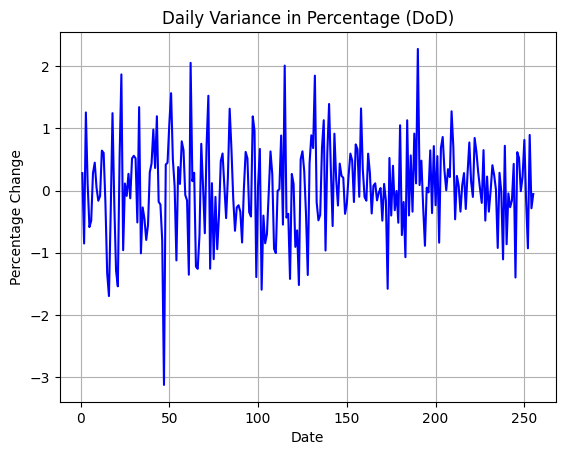

In [27]:
plt.plot(df['DoD'], color='blue', linestyle='-')  # Plot the data
plt.title('Daily Variance in Percentage (DoD)')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Percentage Change')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot

In [29]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['DoD'].values.reshape(-1, 1))

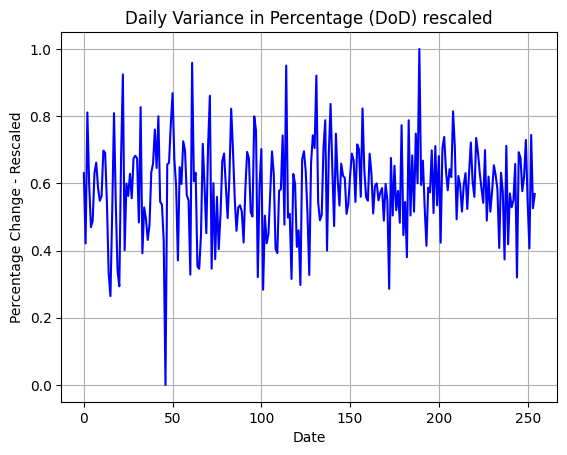

In [30]:
plt.plot(scaled_data, color='blue', linestyle='-')  # Plot the data
plt.title('Daily Variance in Percentage (DoD) rescaled')  # Set the title of the plot
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('Percentage Change - Rescaled')  # Set the label for the y-axis
plt.grid(True)  # Show grid
plt.show()  # Display the plot

In [31]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Function to create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
sequence_length = 10  # Adjust as needed
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Rescale the training data
# X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
# y_train_scaled = scaler.transform(y_train.reshape(-1, 1)).reshape(y_train.shape)

# Rescale the testing data
# X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)
# y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

# Define the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 5s 223ms/step - loss: 0.2303 - val_loss: 0.0953
Epoch 2/100
6/6 [==============================] - 1s 90ms/step - loss: 0.0430 - val_loss: 0.0395
Epoch 3/100
6/6 [==============================] - 0s 74ms/step - loss: 0.0455 - val_loss: 0.0205
Epoch 4/100
6/6 [==============================] - 0s 68ms/step - loss: 0.0249 - val_loss: 0.0324
Epoch 5/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0314 - val_loss: 0.0270
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0257 - val_loss: 0.0197
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0254 - val_loss: 0.0197
Epoch 8/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0241 - val_loss: 0.0207
Epoch 9/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0242 - val_loss: 0.0222
Epoch 10/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0241 - val_loss: 0.0198
Epoch 11/100
6/6 [

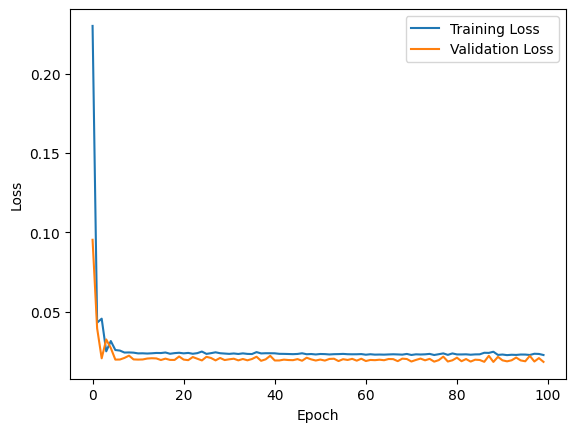

In [35]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

2/2 [==============================] - 0s 7ms/step - loss: 0.0100
Test Loss: 0.01000947505235672


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the financial time series dataset
df = pd.read_csv('FCHI_2Y.csv')  # Replace 'financial_time_series.csv' with your dataset file

In [38]:
# Add a new column named "DoD" to the DataFrame
df['DoD'] = df['Close'].pct_change() * 100

# Drop the first row (index 0) from the DataFrame
df = df.drop(index=0)

In [39]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['DoD'].values.reshape(-1, 1))

Given a sequence (here the lastest sequence of the scaled_data from the CSV file), output the next closing price :

In [40]:
# Take the most recent sequence_length number of closing prices as input
input_sequence = scaled_data[-sequence_length:]

# Reshape the input sequence to match the model's input shape
input_sequence = input_sequence.reshape((1, sequence_length, 1))

# Rescale the input sequence
input_sequence_scaled = scaler.fit_transform(input_sequence.reshape(-1, 1)).reshape(input_sequence.shape)

# Make predictions
predicted_closing_price = model.predict(input_sequence_scaled)

# Inverse transform the predicted closing price to its original scale
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

print("Predicted Closing Price:", predicted_closing_price[0][0])

1/1 [==============================] - 1s 1s/step
Predicted Closing Price: 0.45732188


Generate an array of sequence and the corresponding closing prices :

In [43]:
# Function to create sequences for prediction
def create_input_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

# Load the trained model
# model = load_model('trained_model.h5')  # I use the pre trained model

# Define sequence length
sequence_length = 10  # Adjust as needed

# Create input sequences for prediction
input_sequences = create_input_sequences(scaled_data, sequence_length)

# Predict closing prices for all sequences
predicted_closing_prices = []
for sequence in input_sequences:
    # Reshape the sequence to match the model's input shape
    sequence = sequence.reshape(1, sequence_length, 1)
    # Predict closing price for the sequence
    predicted_price = model.predict(sequence)
    # Inverse transform the predicted closing price to its original scale
    predicted_price = scaler.inverse_transform(predicted_price)
    # Append the predicted closing price to the list
    predicted_closing_prices.append(predicted_price[0][0])

# Create a DataFrame to store the predicted closing prices along with their sequences
predicted_df = pd.DataFrame({'Last Sequence Price': df['DoD'].values[sequence_length-1:], 'Predicted Closing Price': predicted_closing_prices})

# Save the DataFrame to a CSV file
predicted_df.to_csv('predicted_closing_prices.csv', index=False)
print("Predicted closing prices saved to 'predicted_closing_prices.csv'.")

1/1 [==============================] - 0s 32ms/step
Predicted closing prices saved to 'predicted_closing_prices.csv'.
